In [2]:
import cv2
import tensorflow as tf
from IPython.display import Image

# Remove warnings
import sys

if not sys.warnoptions:
    import warnings
    warnings.simplefilter("ignore")



2022-10-08 14:56:09.120191: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/semrival/.local/lib/python3.8/site-packages/cv2/../../lib64:
2022-10-08 14:56:09.120229: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [3]:
CATEGORIES = ["Bearish", "Bullish"]

In [4]:
def prepare(filepath):
    IMG_SIZE = 100                                            # Must be the same size you used on the model 
    img_array = cv2.imread(filepath, cv2.IMREAD_GRAYSCALE)
    new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
    return new_array.reshape(-1, IMG_SIZE, IMG_SIZE, 1)

1/1 [==============================] - 0s 75ms/step
[[1.]]
Bullish


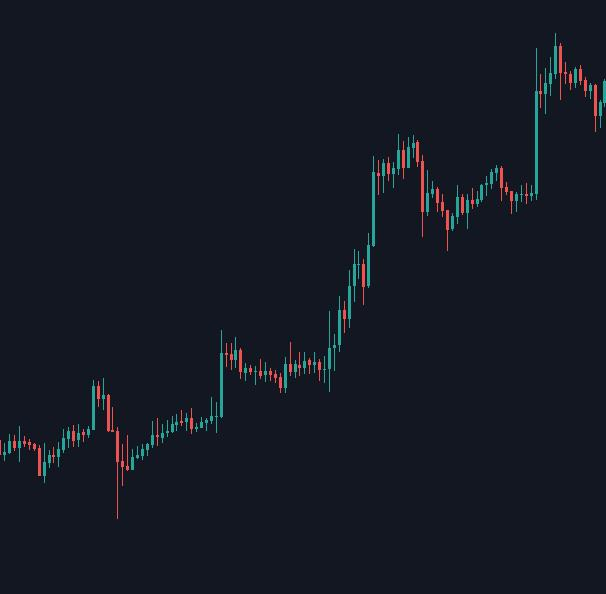

In [8]:
model = tf.keras.models.load_model("Chart-Recognition-64x3-CNN.model")

image = "chart16.jpg"

prediction = model.predict([prepare(image)])
print(prediction)  # will be a list in a list.
print(CATEGORIES[int(prediction[0][0])])

Image(filename=image) 